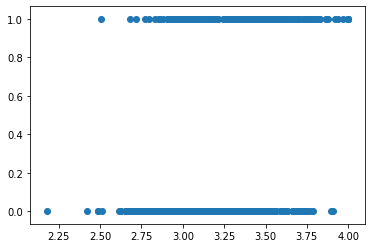

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import os
os.chdir("C:/Users/Lenovo 4/Desktop/Data Quest Folder/Logistic Regression/")
os.getcwd()


admissions = pd.read_csv("admissions.csv")
plt.scatter(admissions['gpa'], admissions['admit'])
plt.show()

Let's now move onto training the logistic regression model using our dataset. We won't dive into the math and the steps required to fit a logistic regression model to the training data in this mission. We'll instead focus on using the scikit-learn library to fit a model between the gpa and admit columns. Recall that the gpa column contains the GPA of each applicant as a real value between 0.0 and 4.0 and the admit column specifies if that applicant was admitted (0 if not admitted and 1 if admitted). Since we're only working with one feature, gpa, this is referred to as a univariate model

In [2]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(admissions[["gpa"]], admissions["admit"])
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

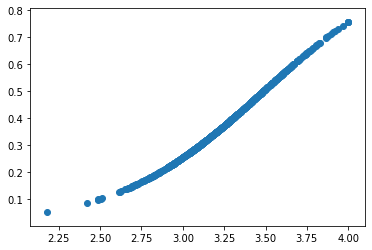

In [3]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])
pred_probs = logistic_model.predict_proba(admissions[["gpa"]])
plt.scatter(admissions["gpa"], pred_probs[:,1])

We mentioned earlier that the output of a logistic regression model is the probability that the row should be labelled as True, or in our case 1. We can use the trained model to return the predicted probability for each row in the training data.

To return the predicted probability, use the predict_proba method. The only required parameter for this method is the num_features by num_sample matrix of observations we want scikit-learn to return predicted probabilities for. For each input row, scikit-learn will return a NumPy array with 2 probability values:

the probability that the row should be labelled 0,
the probability that the row should be labelled 1.
Since 0 and 1 are the only 2 possible categories and represent the entire outcome space, these 2 probabilities will always add upto 1

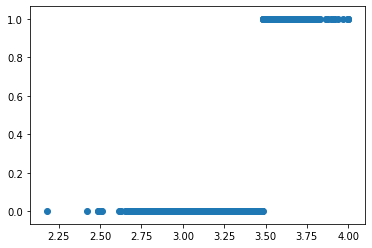

In [4]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])
fitted_labels = logistic_model.predict(admissions[["gpa"]])
plt.scatter(admissions["gpa"], fitted_labels)

You'll notice that the scatter plot suggests a linear relationship between the gpa values and the probability of being admitted. This is because logistic regression is really just an adapted version of linear regression for classification problems. Both logistic and linear regression are used to capture linear relationships between the independent variables and the dependent variable.

Let's now use the predict method to return the label predictions for each row in our training dataset.

# Evaluating Binary Classifiers 


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

admissions = pd.read_csv("admissions.csv")
model = LogisticRegression()
model.fit(admissions[["gpa"]], admissions["admit"])
admissions = pd.read_csv("admissions.csv")
model = LogisticRegression()
model.fit(admissions[["gpa"]], admissions["admit"])

labels = model.predict(admissions[["gpa"]])
admissions["predicted_label"] = labels
print(admissions["predicted_label"].value_counts())
print(admissions.head())

0    507
1    137
Name: predicted_label, dtype: int64
   admit       gpa         gre  predicted_label
0      0  3.177277  594.102992                0
1      0  3.412655  631.528607                0
2      0  2.728097  553.714399                0
3      0  3.093559  551.089985                0
4      0  3.141923  537.184894                0


In [7]:
admissions["actual_label"] = admissions["admit"]
matches = admissions["predicted_label"] == admissions["actual_label"]
correct_predictions = admissions[matches]
print(correct_predictions.head())
accuracy = len(correct_predictions) / len(admissions)
print(accuracy)

   admit       gpa         gre  predicted_label  actual_label
0      0  3.177277  594.102992                0             0
1      0  3.412655  631.528607                0             0
2      0  2.728097  553.714399                0             0
3      0  3.093559  551.089985                0             0
4      0  3.141923  537.184894                0             0
0.6847826086956522


In [11]:
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])
false_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 1)
false_negatives = len(admissions[false_negative_filter])

sensitivity = true_positives / (true_positives + false_negatives)

print(sensitivity)

0.36475409836065575


Sensitivity or True Positive Rate - The proportion of applicants that were correctly admitted:


In [12]:
# From previous screens
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])
false_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 1)
false_negatives = len(admissions[false_negative_filter])
true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
true_negatives = len(admissions[true_negative_filter])
false_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 0)
false_positives = len(admissions[false_positive_filter])
specificity = (true_negatives) / (false_positives + true_negatives)
print(specificity)

0.88


Specificity or True Negative Rate - The proportion of applicants that were correctly rejected:


There are further interesting studies on machine learning bias, espeically the "impossibility result". 